In [38]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial
import random
from inspect import signature

# Annealing

### PART 1 

#### First way

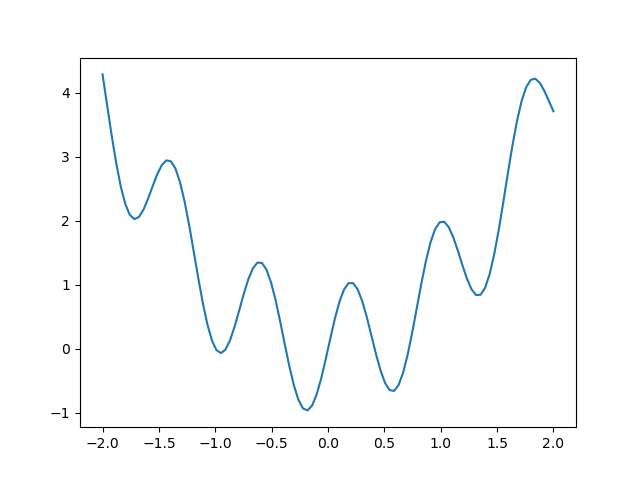

In [55]:

def yfunc(x): #taken in the presentation
    return x**2 + np.sin(8*x)
func=yfunc # please change the function here also when u change below
s=signature(func)
no_of_params=len(list(s.parameters))
if no_of_params==1: #plotting a 1D function
    xbase = np.linspace(-2, 2, 100)
    ybase = yfunc(xbase)
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
else : #plotting a 2D function
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) #creating 3d plots
    xall,yall,zall=[],[],[]
    ax.plot_wireframe(xbase,ybase,zbase)
    lnall, =ax.plot([],[],[],'ro')
    lngood, =ax.plot([],[],[],'go',markersize=10)
bestcost=100000
def anne(frame,func,start,T,dr): #single function for  1d and 2d functions
    s=signature(func)
    no_of_params=len(list(s.parameters))
    if no_of_params==1:
        if frame<=1:
            global bestcost
            bestx=start
        else: 
            bestx,T,bestcost=anne(frame-1,func,start,T,dr)
        decayrate=dr
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = func(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        # return lngood,
        return bestx,T,bestcost
    else :
        if frame<=1:
            #global bestcost
            bestx=start[0]
            besty=start[-1]
        else: 
            bestx,besty,T,bestcost=anne(frame-1,func,start,T,dr)
        decayrate=dr
        dx = (np.random.random_sample() - 0.5) * T
        dy = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        y=besty+dy
        # print(f"Old x = {x}, delta = {dx}")
        z = func(x,y)
        if z < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = z
            bestx = x
            besty=y
            lngood.set_data_3d(x, y,z)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(z-bestcost)/T):
                bestcost = z
                bestx = x
                besty=y
                lngood.set_data_3d(x, y,z)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        zall.append(z)
        lnall.set_data_3d(xall, yall,zall)
        # return lngood,
        return bestx,besty,T,bestcost
ani= FuncAnimation(fig, partial(anne,func=yfunc,start=-2,T=2,dr=0.95), frames=range(15), interval=1000, repeat=False)
plt.show()

- In this I tried to define a function which takes inputs as fuction (to be optimized), starting point, temperature, decay rate
- In order to animate such function, I used 'partial' function imported from functools. 
- The partial() is used for partial function application which “freezes” some portion of a function’s arguments and/or keywords resulting in a new object with a simplified signature.
- Here it returns a function with frame as its parameter
- I used signature function which is imported from inspect library to find the no. of parameters taken by the function to be optimized
- If it is 1D function, I used the same code which is given in the presentation.
- Basically we are taking random point and evaluating it's value, if it's value is less than best cost, the point will be updated in lngood,
- If it is not we find the probability of moving that point using e^((bestcost-y)/T) and we generate a random number with in range of 0 and 1.
- If the probability is greater than that random number, we move the point to the new or else we don't.Then T is decreased to decay rate times
- In order to update bestx, bestcost and T after each iteration done by FuncAnimation, I am updating after frame crosses 1.
- As I don't exactly how many times it is iterating,So I have updated the values with the frame-1 values.
- In the same way the code is generalised to 2D functions
- I have written approach for both 1D and 2D but I didn't test for 2D functions.
- I did a second way for this part as I am not satisfied with it's result.

#### Second way

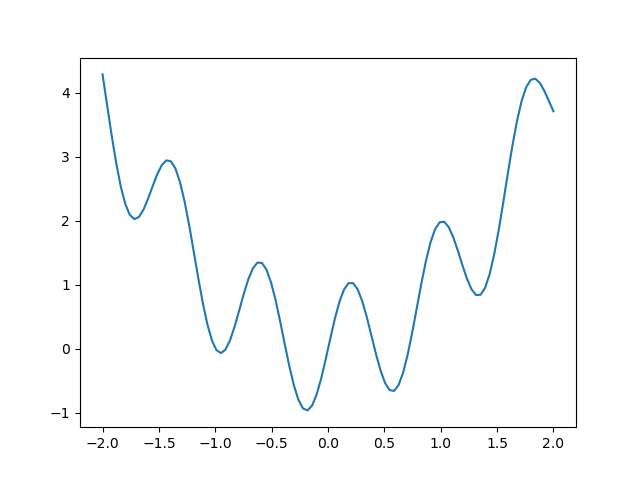

In [58]:
bestcost=10000
def an(func,start,T,decayrate): #function common for all the parameters and returns all the required paramters for onestep and twostep function
    s=signature(func)
    no_of_params=len(list(s.parameters))
    if no_of_params==1:
        xbase = np.linspace(-2, 2, 100)
        ybase = func(xbase)
        bestx=start
        return no_of_params,xbase,ybase,bestx,func,T,decayrate
    else :
        xbase = np.linspace(-2, 2, 100)
        ybase = np.linspace(-2, 2, 100)
        X,Y = np.meshgrid(xbase,ybase)
        zbase=func(X,Y)
        bestx=start[0]
        besty=start[-1]
        return no_of_params,xbase,ybase,zbase,bestx,besty,func,T,decayrate
no_of_params,xbase,ybase,bestx,func,T,decayrate=an(yfunc,-2,3.0,0.95)
#no_of_params,xbase,ybase,zbase,bestx,besty,func,T,decayrate=an(func,[-2,-2],3.0,0.95)
if no_of_params==1:
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
else :
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) #creating 3d plots
    xall,yall,zall=[],[],[]
    ax.plot_wireframe(xbase,ybase,zbase)
    lnall, =ax.plot([],[],[],'ro')
    lngood, =ax.plot([],[],[],'go',markersize=10)

def onestep(frame): # for 1d function
    global bestcost,func, bestx, decayrate, T
    # Generate a random value \in -2, +2
    dx = (np.random.random_sample() - 0.5) * T
    x = bestx + dx
    # print(f"Old x = {x}, delta = {dx}")
    y = func(x)
    if y < bestcost:
        # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
        bestcost = y
        bestx = x
        lngood.set_data(x, y)
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(y-bestcost)/T):
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        # print(f"New cost {y} worse than best so far: {bestcost}")
        pass
    T = T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    #return lngood,
def twostep(frame): #for 2d function
    global bestcost,zfunc,bestx,besty,decayrate,T
    dx = (np.random.random_sample() - 0.5) * T
    dy = (np.random.random_sample() - 0.5) * T
    x = bestx + dx
    y=besty+dy
    # print(f"Old x = {x}, delta = {dx}")
    z = func(x,y)
    if z < bestcost:
        bestcost = z
        bestx = x
        besty=y
        lngood.set_data_3d(x, y,z)
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(z-bestcost)/T):
            bestcost = z
            bestx = x
            besty=y
            lngood.set_data_3d(x, y,z)
        pass
    T = T * decayrate
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data_3d(xall, yall,zall)
    # return lngood,
if no_of_params==1:
    anim= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
else :
    anim= FuncAnimation(fig, twostep, frames=range(100), interval=100, repeat=False)
plt.show()

- The same logic is used as above but I have written three functions.
- 'an' function is used to give the parameter as global variables to the onestep and twostep functions.
- onestep function is taken from the presentation, the same logic as above one.
- two step function is the generalised way of onestep for 2D function.
- anim is also updated according to the function i.e., onestep for 1D fucntion and twostep for 2D function
- Even here I used signature function to find whether the function is 1D or 2D
- In both the processes, I created figures and axes accordingly same as done in week 6 

### Part 2

In [62]:
def dist(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

- dist function finds out the distance between two points

In [63]:
def total_dist(lis):
    lis1=lis.copy()
    lis1.append(lis1[0])
    td=0
    for j in range(len(lis1)-1):
        td+=dist(lis1[j][0],lis1[j][-1],lis1[j+1][0],lis1[j+1][-1])
    return td

- total_dist function is used to find the total distance covered in moving from point to another in the list and finally to the point where we started. So, I appended the first point in the end of the list.

In [60]:
def sales(filename):
    file=open(filename,'r') #step1
    no_of_cities=0
    cit_lis=[]
    count=0
    for i in file:
        if count==0 : 
            no_of_cities=int(i)
            count+=1
        else :
            cit_lis.append(list(map(float,i.split())))
    file.close()
    cit_lis1=cit_lis.copy()
    bc=total_dist(cit_lis)# step 2
    T=3
    dr=0.95
    best=cit_lis.copy()
    print(best)
    for i in range(100*len(cit_lis)):
        l=random.sample(range(0, len(cit_lis)), 2)
        p1=l[0]
        p2=l[-1]
        cit_lis[p1],cit_lis[p2]=cit_lis[p2],cit_lis[p1]
        if total_dist(cit_lis)<bc:
            bc=total_dist(cit_lis)
            best=cit_lis.copy()
        else :
            toss=np.random.random_sample()
            if toss < np.exp(-(total_dist(cit_lis)-bc)/T):
                bc=total_dist(cit_lis)
                best=cit_lis.copy()
        T=T*dr
    order=[] #step 3
    for l in best:
        for m in range(len(best)):
            if cit_lis1[m]==l: order.append(m)
    return best,bc,order

- The input to the sales function is filename of input file file containing no. of cities N in the first line and next N lines give the cities as a list of x,y coordinates.
- We use Annealing method to find the minimu distance to cover all the ciites and reach the city where u started.
- step 1 : reading the files and creating a list with all the coordinates of cities.
- step 2 : Here bc is the bestcost. I initiated the bestcost with the total distance calculated using total_dist function of the ciites in the order given in the input file.
- Now I am selecting two random coordinates by randoml generating two samples within the range of no. of cities using random_sample function.
- The cordinates corresponding to this generated random integer indices are swapped.
- And then calculate the total distance again. If it is less than best cost ,this list is copied in best and bc (bestcost) is also updated.
- Or else, generate a random number within range of 0 and 1. and find the probability using e^((bc-total_dist(cit_lis))/T) and compare it with the toss variable.
- If probability is greater than toss, accept that list update the best with this list and update the bestcost too.
- Annealing accepts this changes when the temperature is high.
- As the temperature reduces, it doesn't accept the moves/ lists whose total distance is greater than bestcost(bc).
- This process is repeated for 100 times the no. of cities to travel and for each iteration T is decreased to decayrate times
- In this way optimum solution is found.
- step 3 : In order to get final order of the cities we are checking the index of the coordinate with respect to the input list(cit_list1) and appending it to the order list.
- Finally we are returning best(best solution i.e., minimum distance), bc(bestcost or the total distance travelled using the best solution obtained), order to travel with respect to the input coordinates

[[3.26, 7.01], [6.77, 3.82], [9.69, 9.97], [7.4, 0.33], [4.53, 1.44], [1.91, 3.67], [0.28, 9.05], [6.36, 3.98], [9.13, 8.86], [5.99, 4.36]]


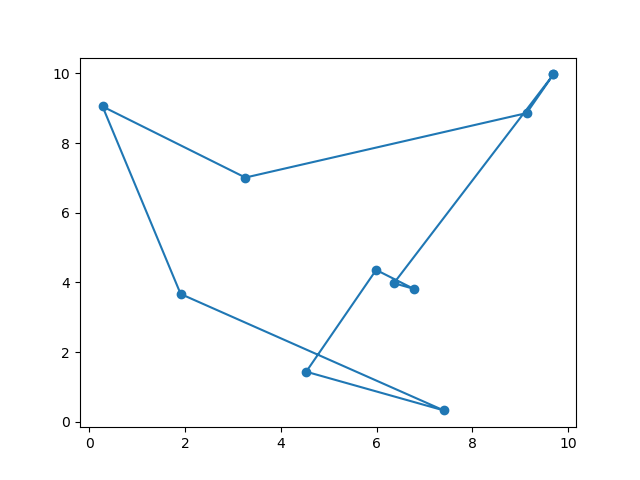

37.64095696495824
[2, 7, 1, 9, 4, 3, 5, 6, 0, 8]


In [65]:
best,bc,order=sales('tsp_10.txt')
x_cities=[best[i][0] for i in range(len(best))]
y_cities=[best[i][-1] for i in range(len(best))]
fig,ax=plt.subplots()
xplot = np.append(x_cities, x_cities[0])
yplot = np.append(y_cities, y_cities[0])
plt.plot(xplot, yplot, 'o-')
plt.show()
print(bc)
print(order)

- When we call the sales function it prints the list coordinates.
- then it plots the shortest path obtaine from the function
- Then prints the total distance travelled in that path and order to travel

[[6.82, 5.93], [1.26, 0.77], [4.72, 3.88], [2.16, 9.79], [4.75, 4.65], [5.07, 3.79], [4.49, 7.54], [5.39, 8.46], [5.46, 2.7], [1.74, 3.01], [4.23, 2.16], [0.37, 2.52], [8.66, 5.24], [5.66, 1.86], [5.92, 9.78], [8.43, 7.28], [4.45, 6.82], [3.78, 5.38], [4.96, 8.0], [8.07, 8.2], [2.37, 3.16], [3.28, 9.07], [3.44, 9.44], [5.07, 2.23], [7.55, 3.43], [9.25, 8.38], [5.3, 2.95], [5.51, 8.94], [2.54, 4.04], [0.18, 6.54], [8.58, 8.73], [0.61, 8.79], [3.48, 0.02], [4.23, 0.41], [6.45, 6.05], [3.71, 3.04], [4.22, 8.74], [0.36, 2.14], [8.17, 5.0], [7.71, 7.33], [7.29, 2.81], [4.07, 4.88], [8.63, 6.68], [2.74, 1.62], [0.59, 0.12], [9.05, 2.11], [5.45, 0.55], [8.26, 1.21], [5.88, 1.2], [6.19, 1.43], [8.5, 6.89], [7.55, 1.19], [6.77, 7.67], [0.71, 7.8], [2.14, 8.78], [0.72, 9.59], [9.44, 0.37], [8.54, 4.99], [5.71, 1.11], [0.72, 6.95], [7.61, 4.13], [7.21, 4.59], [4.42, 1.07], [7.89, 5.22], [2.31, 4.43], [6.52, 7.9], [2.06, 3.2], [4.4, 2.99], [7.87, 1.61], [3.21, 2.52], [1.36, 0.98], [2.29, 6.76], [9

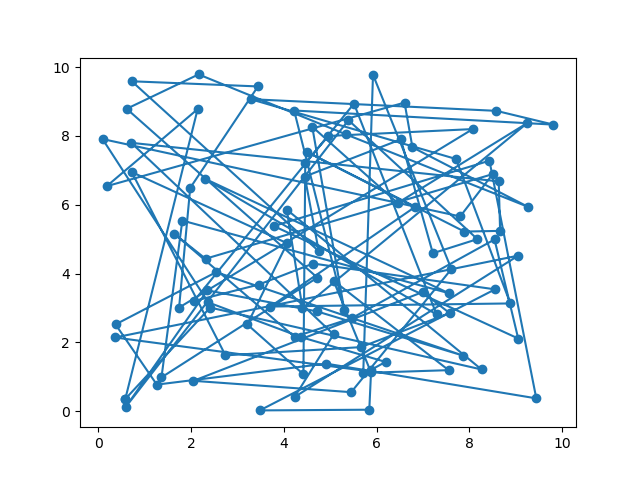

416.700388903751
[81, 83, 47, 88, 67, 25, 34, 80, 26, 36, 86, 30, 21, 39, 87, 35, 0, 6, 63, 12, 42, 53, 23, 33, 72, 37, 75, 5, 51, 58, 14, 60, 46, 79, 94, 74, 13, 43, 59, 41, 69, 62, 76, 18, 19, 9, 90, 22, 55, 4, 16, 65, 61, 38, 7, 44, 91, 78, 68, 28, 11, 1, 98, 56, 15, 17, 45, 57, 8, 10, 96, 64, 50, 95, 97, 20, 85, 49, 48, 82, 32, 92, 89, 77, 66, 27, 40, 71, 24, 73, 70, 2, 31, 3, 99, 84, 52, 93, 29, 54]


In [78]:
best1,bc1,order1=sales('tsp_100.txt')
x1_cities=[best1[i][0] for i in range(len(best1))]
y1_cities=[best1[i][-1] for i in range(len(best1))]
fig,ax=plt.subplots()
xplot = np.append(x1_cities, x1_cities[0])
yplot = np.append(y1_cities, y1_cities[0])
plt.plot(xplot, yplot, 'o-')
plt.show()
print(bc1)
print(order1)

- The first plot is for tsp_10 inputs file and the second plot is for tsp_100 inputs file.
- These are the shortest path I could obtain from the function

###### NOTE:
- First import the libraries which u require.
- Run the user defined function before you use it in some other cell.

- This is an .ipynb file, which we can run in Jupyter notebook or Jupyter lab.
- In Jupyter lab, we need to upload this document to the workspace and start editting and running.
- In jupyter notebook, which is a local host of our pc, we need to know where the file is located, opening this file is same as we do in file manager.
- To open in jupyter notebook, first we need to unzip the file i.e., extract all the files from it and open the ipynb file.